# Reading from a CSV

## Install

In [1]:
SYFT_VERSION = ">=0.8.1b0,<0.9"
package_string = f'"syft{SYFT_VERSION}"'
# !pip install {package_string} -f https://whls.blob.core.windows.net/unstable/index.html

In [2]:
import syft as sy
sy.requires(SYFT_VERSION)

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /


Failed to find type for key: value in <enum '_NoDefault'>
Failed to find type for key: __parameters__ in <class 'typing._UnionGenericAlias'>
Failed to find type for key: _value in <class 'result.result.Err'>
Failed to find type for key: __parameters__ in <class 'typing._UnionGenericAlias'>
Failed to find type for key: _type_name in <class 'zmq.green.core._Socket'>
Failed to find type for key: value in <enum 'NodeType'>
Failed to find type for key: value in <enum 'ServiceRole'>
Failed to find type for key: value in <enum 'ActionPermission'>
Failed to find type for key: settings in <class 'syft.store.document_store.StorePartition'>
Failed to find type for key: path in <class 'syft.types.grid_url.GridURL'>
Failed to find type for key: value in <enum 'CMPCRUDPermission'>
Failed to find type for key: value in <enum '_ParameterKind'>
Failed to find type for key: value in <enum 'VPNRoutes'>
Failed to find type for key: value in <enum 'CommandStatus'>
Failed to find type for key: value in <enu

In [3]:
node = sy.orchestra.launch(name="pandas-test-domain-1", port=8081, reset=True)

Starting pandas-test-domain-1 server on 0.0.0.0:8081


kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /


Failed to find type for key: value in <enum '_NoDefault'>
Waiting for server to start
Failed to find type for key: __parameters__ in <class 'typing._UnionGenericAlias'>
Failed to find type for key: _value in <class 'result.result.Err'>
Failed to find type for key: __parameters__ in <class 'typing._UnionGenericAlias'>
Failed to find type for key: _type_name in <class 'zmq.green.core._Socket'>
Failed to find type for key: value in <enum 'NodeType'>
Failed to find type for key: value in <enum 'ServiceRole'>
Failed to find type for key: value in <enum 'ActionPermission'>
Failed to find type for key: settings in <class 'syft.store.document_store.StorePartition'>
Failed to find type for key: port in <class 'syft.types.grid_url.GridURL'>
Failed to find type for key: value in <enum 'CMPCRUDPermission'>
Failed to find type for key: value in <enum '_ParameterKind'>
Waiting for server to start
Waiting for server to start
Failed to find type for key: value in <enum 'VPNRoutes'>
Failed to find type

# Data owner: Upload data

In [4]:
root_domain_client = node.login(email="info@openmined.org", password="changethis")

## Load data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from dateutil.parser import parse
from pandas._libs.tslibs.timestamps import Timestamp
from syft import autocache
from syft.util.util import PANDAS_DATA

In [6]:
data_path = autocache(f"{PANDAS_DATA}/bikes.csv")

In [7]:
broken_df = pd.read_csv(data_path, encoding = "ISO-8859-1")

In [8]:
broken_df

,Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;
3,04/01/2012;144;;1;116;318;111;8;61;
4,05/01/2012;197;;2;124;330;97;13;95;
...,...
305,01/11/2012;2405;;1208;1701;3082;2076;165;2461
306,02/11/2012;1582;;737;1109;2277;1392;97;1888
307,03/11/2012;844;;380;612;1137;713;105;1302
308,04/11/2012;966;;446;710;1277;692;197;1374


In [9]:
fixed_df = pd.read_csv(data_path, sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
fixed_df[:3]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


In [10]:
import numpy as np
from random import randint

def get_mock_int(i, var=10):
    base = 100 + int(np.cos(i/10) * 50)
    return randint(max(base-var, 1),max(1, base+var))

def get_mock_date(i):
    return str(parse('Jun 1 2005').date() + timedelta(days=i))

# some randomness
r = [(randint(1, 40), randint(1, 40)) for _ in range(7)]

def get_mock_row(i):
    res = [get_mock_int(i+r[j][0], r[j][1]) for j in range(7)]
    # add NaNs in the second and 10th col
    res.insert(1, None), res.insert(9, None)
    return res
    

In [11]:
mock = pd.DataFrame(index=[Timestamp(get_mock_date(i)) for i in range(len(fixed_df))],
                    data=[get_mock_row(i) for i in range(len(fixed_df))],
                    columns=fixed_df.columns)

Upload the data

In [12]:
dataset = sy.Dataset(name="test",
                     asset_list=[sy.Asset(name="bikes", data=fixed_df, mock=mock, mock_is_real=False)])
root_domain_client.upload_dataset(dataset)


100%|██████████| 1/1 [00:00<00:00,  6.29it/s]


Uploading: bikes


<class 'syft.service.response.SyftSuccess'>: Dataset Added

## Create user account

In [13]:
user = root_domain_client.register(name="Jane Doe", email="jane@caltech.edu",
                            password="abc123", institution="Caltech", website="https://www.caltech.edu/")

In [14]:
# todo: give user data scientist role

In [15]:
guest_domain_client = node.client

In [16]:
guest_client = guest_domain_client.login(email="jane@caltech.edu", password="abc123")

# Data scientist: request execution

## Download mock create result pointer

### Get pointer

In [18]:
guest_domain_client = node.client
guest_client = guest_domain_client.login(email="jane@caltech.edu", password="abc123")

In [19]:
ds = guest_domain_client.datasets[0]

In [20]:
asset = ds.assets["bikes"]

In [29]:
df_pointer = asset.mock

### Selecting a column

When you read a CSV, you get a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

Here's an example:

In [30]:
df_pointer['Berri 1']

```python
TwinPointer(Mock)
```
2005-06-01    117
2005-06-02    111
2005-06-03     87
2005-06-04     72
2005-06-05     84
             ... 
2006-04-02    128
2006-04-03    139
2006-04-04    143
2006-04-05    111
2006-04-06    114
Name: Berri 1, Length: 310, dtype: int64

### Plotting a column

Just add .plot() to the end! How could it be easier? =)

We can see that, unsurprisingly, not many people are biking in January, February, and March,

```python
Pointer
```
<AxesSubplot: >

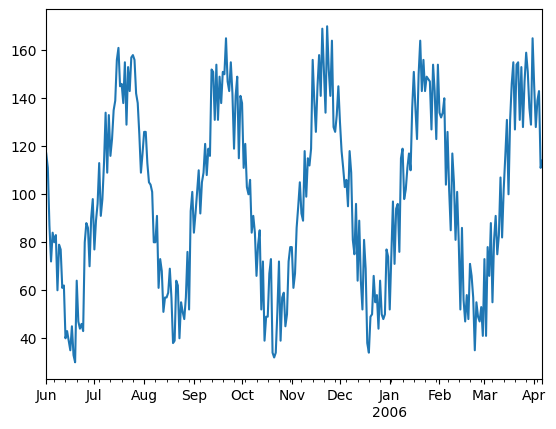

In [31]:
df_pointer['Berri 1'].plot()

We can also plot all the columns just as easily. We'll make it a little bigger, too. You can see that it's more squished together, but all the bike paths behave basically the same -- if it's a bad day for cyclists, it's a bad day everywhere.

In [ ]:
df_pointer.plot(figsize=(15, 10))

### Putting that all together

Here's the code we needed to write do draw that graph, all together:



```python
Pointer
```
<AxesSubplot: >

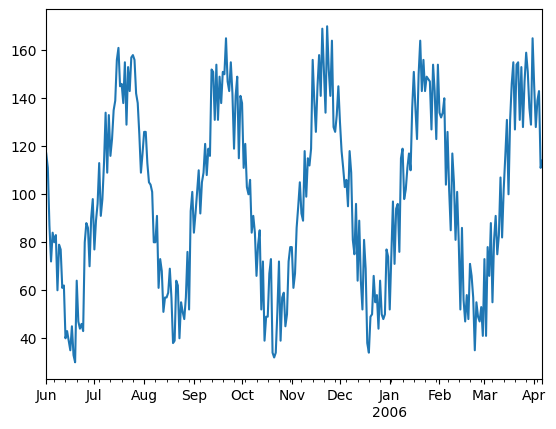

In [38]:
df_pointer['Berri 1'].plot()

In [39]:
res = df_pointer['Berri 1']

In [40]:
res.request(guest_client)

```python
class Request:
  id: str = 3de6ae58d3e4426fbbec159324270b67
  requesting_user_verify_key: str = 6ce94671e98a18e025b07e8a496e01e61a2e587d64b2b64bd8abdf678aeba927
  approving_user_verify_key: str = None
  request_time: str = 2023-05-17 10:53:24
  approval_time: str = None
  status: str = RequestStatus.PENDING
  node_uid: str = 35ef33edce7e4e339f048c8b3e250697
  request_hash: str = "282505e252641b55434b8f11c0d74445aebb28d5c7da51e4007bb22d5c1d3838"
  changes: str = [syft.service.request.request.ActionStoreChange]

```

# Data owner: execute function

In [41]:
domain_client = node.client.login(email="info@openmined.org", password="changethis")

In [46]:
domain_client.api.services.request[0].approve()

<class 'syft.service.response.SyftSuccess'>: Request 3de6ae58d3e4426fbbec159324270b67 changes applied

# Data scientist: fetch result

In [47]:
guest_client = guest_domain_client.login(email="jane@caltech.edu", password="abc123")

In [48]:
real_result = res.get_from(guest_client)

<AxesSubplot: >

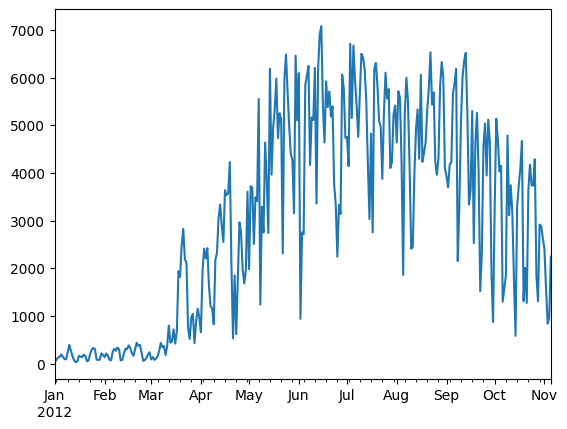

In [50]:
real_result.plot()

In [48]:
if node.node_type.value == "python":
    node.land()

Stopping pandas-test-domain-1
